#6. QUALITY CHECKS AND EXPLORATORY DATA ANALYSIS

##6.01 Initial work.

In [0]:
#Importing basic libraries:
import pandas as pd
import numpy as np
import timeit
import ujson
import os

In [2]:
#Click on the link, copy the authorization code and paste it on the box.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Now we have access to our own Google Drive account:
!ls -lh "/content/drive/My Drive/"

total 3.2G
drwx------ 2 root root 4.0K Jul 14 07:08  20180714_Deep_Learning
-rw------- 1 root root  76K Oct 22 18:13  6885.json
drwx------ 2 root root 4.0K Jun 26  2016 'avast! Files (XT1068, UWbYzWPVmAmwlrlD)'
-rw------- 1 root root 2.4M Nov 18 17:06  Cast_Crew_ids.csv
drwx------ 2 root root 4.0K Jul 18 18:38 'Colab Notebooks'
-rw------- 1 root root  44K Feb  4  2018  contacts.vcf
-rw------- 1 root root    1 Apr  9  2018  facturaIVA.gsheet
-rw------- 1 root root  50K Nov  9 13:01  genres.xlsx
-rw------- 1 root root 1.5M Oct 24 17:34  IMDB_5000_movie.csv
-rw------- 1 root root  12K Nov  3 10:33  InflationConverter.xlsx
-rw------- 1 root root    1 Nov 10 10:21 'Mis cuentas.gsheet'
-rw------- 1 root root  93K Nov 18 17:05  Movies_ids.csv
-rw------- 1 root root 2.2M Nov 16 17:17  MoviesUS.csv
-rw------- 1 root root 1.5G Oct 12 15:09  movies.zip
-rw------- 1 root root    1 Nov 17 16:27 'Nuestras Cuentas.gsheet'
-rw------- 1 root root 1.8G Oct 27 13:06  people.zip
-rw------- 1 root root 6.4

In [0]:
# Install the PyDrive wrapper & import libraries. This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client. This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Getting files from my Google Drive account:

#movies data
file_id = '1-jrX_p1VfgMceGIj7SK_eIef8syIGsdL'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("movies.zip")

#movies ids
file_id = '1-1M-smshevfKWEj5DPpxHJ6QzP82m2c7'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("Movies_ids.csv")

#people data
file_id = '1UnpPTqVcghfQzj55RIoLm8pBH_Rjdl4f'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("people.zip")

#people ids
file_id = '19oOa9qjMFnDv19DHmNTTJKIuGW8X5BkQ'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("Cast_Crew_ids.csv")

#IMDB 5000 movies:
file_id = '1ebj6EkGylXTGldfGfJO_AHEAncNf4zKA'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("IMDB_5000_movie.csv")

In [6]:
!ls -lh

total 3.2G
-rw-r--r-- 1 root root 2.5K Nov 19 08:03 adc.json
-rw-r--r-- 1 root root 2.4M Nov 19 08:04 Cast_Crew_ids.csv
drwx------ 3 root root 4.0K Nov 19 08:02 drive
-rw-r--r-- 1 root root 1.5M Nov 19 08:04 IMDB_5000_movie.csv
-rw-r--r-- 1 root root  93K Nov 19 08:04 Movies_ids.csv
-rw-r--r-- 1 root root 1.5G Nov 19 08:03 movies.zip
-rw-r--r-- 1 root root 1.8G Nov 19 08:04 people.zip
drwxr-xr-x 2 root root 4.0K Nov 15 19:33 sample_data


In [7]:
#We will get an error message. No worries about it!
!mkdir themoviedb_data
!cd themoviedb_data && unzip -q ../movies.zip
!cd themoviedb_data && unzip -q ../people.zip
!ls -lh themoviedb_data

warning [../movies.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [../movies.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #409792).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
warning [../people.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [../people.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #1197557).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
total 45M
drwxr-xr-x 2 root root 12M Nov 

In [8]:
!ls -1 themoviedb_data/movies | wc -l

409791


In [9]:
!ls -1 themoviedb_data/people | wc -l

1197556


## 6.02 Creating my movies dataframe.

We will import the files only for our selected ids. We will now call the movies dataframe as **`dfMoviesUS`**, as it only includes information of movies released in the US.

In [10]:
#Reading file and saving in df
dfMoviesIds = pd.read_csv('./Movies_ids.csv')
dfMoviesIds.tail()

,Unnamed: 0,movie_id
8785,8785,10226
8786,8786,47760
8787,8787,449749
8788,8788,38303
8789,8789,17431


In [0]:
setMoviesIds = set(dfMoviesIds['movie_id'])

In [0]:
def moviesIterator(path):
    intI = 0
    for root, dirs, files in os.walk(path):
        for f in files:
            intI += 1
            if f.endswith('.json'):
                fp = os.path.join(root,f)
                with open(fp) as o:
                    data = ujson.load(o)
                
                if intI % 10000 == 0:
                    print(intI)
                    
                result = {"titles": data["alternative_titles"]["titles"], 
                       "budget": data["budget"], "credits_cast": data["credits"]["cast"], "credits_crew": data["credits"]["crew"],
                       "genres": data["genres"], "movie_id": data["id"], "imdb_id": data["imdb_id"],
                       "keywords": data["keywords"]["keywords"], "original_language": data["original_language"],
                       "original_title": data["original_title"], "overview": data["overview"],
                       "popularity": data["popularity"], 
                       "production_companies": data["production_companies"], "production_countries": data["production_countries"],
                       "release_date": data["release_date"], "release_dates": data["release_dates"]["results"],
                       "revenue": data["revenue"], 
                       "reviews_page": data["reviews"]["page"],
                       "reviews_results": data["reviews"]["results"],
                       "reviews_total_pages": data["reviews"]["total_pages"],
                       "reviews_total_results": data["reviews"]["total_results"],
                       "runtime": data["runtime"],
                       "spoken_languages": data["spoken_languages"], "status": data["status"],
                       "tagline": data["tagline"], "title": data["title"], 
                       "vote_average": data["vote_average"], "vote_count": data["vote_count"]}
                    
                if data["belongs_to_collection"] is None:
                    result["belongs_to_collection_id"] = None
                    result["belongs_to_collection_name"] = None
                else:
                    result["belongs_to_collection_id"] = data["belongs_to_collection"]["id"]
                    result["belongs_to_collection_name"] = data["belongs_to_collection"]["name"]
                    
                if data["adult"] == False and data["id"] in setMoviesIds:
                    yield result                      

In [13]:
#Approximate execution time in Google Colab: 5min
path = "./themoviedb_data/movies"
dfMoviesUS = pd.DataFrame()
tic=timeit.default_timer()
dfMoviesUS = pd.DataFrame(moviesIterator(path))
toc=timeit.default_timer()
print((toc - tic)/60, ' min') #elapsed time in minutes

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
5.203997269516666  min


In [14]:
dfMoviesUS.shape

(8790, 30)

In [15]:
dfMoviesIds.shape

(8790, 2)

In [16]:
dfMoviesUS.columns

Index(['belongs_to_collection_id', 'belongs_to_collection_name', 'budget',
       'credits_cast', 'credits_crew', 'genres', 'imdb_id', 'keywords',
       'movie_id', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'release_dates', 'revenue', 'reviews_page',
       'reviews_results', 'reviews_total_pages', 'reviews_total_results',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'titles',
       'vote_average', 'vote_count'],
      dtype='object')

These are the functions we need to deal with "list of dictionaries" columns:

In [0]:
def columnIteratorMovies(columnName, *args):
    for id in dfMoviesUS.index:
        for dict in dfMoviesUS[dfMoviesUS.index == id][columnName].iloc[0]:
            outputDict = {'movie_id': id}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

def columnProcessesMovies (columnName, *args):
    #We need to declare dfMoviesUS as global as we will change it inside this function.
    global dfMoviesUS
    
    dfOutput = pd.DataFrame()
    dfOutput = pd.DataFrame(columnIteratorMovies(columnName, *args))
    
    #Sanity check:
    dfCheck = pd.DataFrame(dfMoviesUS[columnName].map(len).value_counts())
    dfCheck['calculation']=dfCheck[columnName]*dfCheck.index
    
    if dfOutput.shape[0] == dfCheck['calculation'].sum():
        dfMoviesUS = dfMoviesUS.drop(columnName, axis=1)
        return dfOutput
    else:
        return "Error in process"

def columnIteratorReleaseDates(*args):
    dfMoviesReleaseDates1 = columnProcessesMovies ('release_dates', 'iso_3166_1', 'release_dates')
    
    for id in dfMoviesReleaseDates1.index:
        for dict in dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['release_dates'].iloc[0]:
            outputDict = {'movie_id': dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['movie_id'].iloc[0],
                         'iso_3166_1': dfMoviesReleaseDates1[dfMoviesReleaseDates1.index == id]['iso_3166_1'].iloc[0]}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict            

Now we import IMDb dataset to add revenue and budget information to **`dfMoviesUS`**:

In [0]:
my_file_path='./IMDB_5000_movie.csv'

#Reading file and saving in df
dfMovies5000 = pd.read_csv(my_file_path)

#Let's create a new column in dfMovies5000 with IMDb identifier:
dfMovies5000['imdb_id'] = dfMovies5000['movie_imdb_link'].str.split("/").map(lambda list: list[4])

#Removing duplicates:
dfMovies5000 = dfMovies5000.drop_duplicates(subset='imdb_id', keep='first')

#Let´s clean up the '' to null values:
dfMoviesUS['imdb_id']=dfMoviesUS['imdb_id'].map(lambda x: None if x=='' else x)

#Renaming before merging:
dfMovies5000 = dfMovies5000.rename(columns={'gross': 'imdb_revenue', 'budget': 'imdb_budget'})

#Merging:
dfMoviesUS = dfMoviesUS.merge(dfMovies5000[['imdb_id', 'imdb_revenue', 'imdb_budget']], how='left', on='imdb_id')

#Converting 0's to null values:
dfMoviesUS['revenue'] = dfMoviesUS['revenue'].map(lambda num: None if num != num or num is None or num==0 else num)
dfMoviesUS['budget'] = dfMoviesUS['budget'].map(lambda num: None if num != num or num is None or num==0 else num)

#Combining TMDB and IMDb information for revenue and budget:
dfMoviesUS['revenue_final'] = dfMoviesUS['revenue'].combine_first(dfMoviesUS['imdb_revenue'])
dfMoviesUS['budget_final'] = dfMoviesUS['budget'].combine_first(dfMoviesUS['imdb_budget'])
dfMoviesUS.loc[(dfMoviesUS['revenue']<=50) & (dfMoviesUS['imdb_revenue'].notnull()), 'revenue_final'] = dfMoviesUS.loc[(dfMoviesUS['revenue']<=50) & (dfMoviesUS['imdb_revenue'].notnull()), 'imdb_revenue']
dfMoviesUS.loc[(dfMoviesUS['budget']<=50) & (dfMoviesUS['imdb_budget'].notnull()), 'budget_final'] = dfMoviesUS.loc[(dfMoviesUS['budget']<=50) & (dfMoviesUS['imdb_budget'].notnull()), 'imdb_budget']

And then we deal with "list of dictionaries" columns of **`dfMovieUS`**:

In [19]:
#This module takes less than 4min to be executed in Google Colab.

#Firstly we need movies ids to be the index of dfMoviesUS.
dfMoviesUS.index = dfMoviesUS['movie_id']

tic=timeit.default_timer()

dfMoviesCast = columnProcessesMovies ('credits_cast', 'cast_id', 'character', 'gender', 'id', 'name', 'order')
print("dfMoviesCast generated")
dfMoviesCrew = columnProcessesMovies ('credits_crew', 'department', 'gender', 'id', 'job', 'name')
print("dfMoviesCrew generated")
dfMoviesGenres = columnProcessesMovies ('genres', 'id', 'name')
print("dfMoviesGenres generated")
dfMoviesKeywords = columnProcessesMovies ('keywords', 'id', 'name')
print("dfMoviesKeywords generated")
dfMoviesProductionComp = columnProcessesMovies ('production_companies', 'id', 'name', 'origin_country')
print("dfMoviesProductionComp generated")
dfMoviesProductionCountries = columnProcessesMovies ('production_countries', 'iso_3166_1', 'name')
print("dfMoviesProductionCountries generated")
dfMoviesReviewsResults = columnProcessesMovies ('reviews_results', 'author', 'content', 'id')
print("dfMoviesReviewsResults generated")
dfMoviesSpokenLang = columnProcessesMovies ('spoken_languages', 'iso_639_1', 'name')
print("dfMoviesSpokenLang generated")
dfMoviesReleaseDates = pd.DataFrame(columnIteratorReleaseDates('certification', 'iso_639_1', 'release_date', 'type'))
print("dfMoviesReleaseDates generated")

toc=timeit.default_timer()
print((toc - tic)/60, ' min') #elapsed time in minutes

dfMoviesCast generated
dfMoviesCrew generated
dfMoviesGenres generated
dfMoviesKeywords generated
dfMoviesProductionComp generated
dfMoviesProductionCountries generated
dfMoviesReviewsResults generated
dfMoviesSpokenLang generated
dfMoviesReleaseDates generated
3.2429999272833316  min


In [20]:
dfMoviesUS.shape

(8790, 25)

In [21]:
dfMoviesUS.columns

Index(['belongs_to_collection_id', 'belongs_to_collection_name', 'budget',
       'imdb_id', 'movie_id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'reviews_page',
       'reviews_total_pages', 'reviews_total_results', 'runtime', 'status',
       'tagline', 'title', 'titles', 'vote_average', 'vote_count',
       'imdb_revenue', 'imdb_budget', 'revenue_final', 'budget_final'],
      dtype='object')

##6.03 Creating my people dataframe.

In [0]:
#Reading file and saving in df
dfPeopleIds = pd.read_csv('./Cast_Crew_ids.csv')
setPeopleIds = set(dfPeopleIds['id'])

In [0]:
def peopleIterator(path):
    intI = 0
    for root, dirs, files in os.walk(path):
        for f in files:
            intI += 1
            if f.endswith('.json'):
                fp = os.path.join(root,f)
                with open(fp) as o:
                    data = ujson.load(o)
                
                if intI % 10000 == 0:
                    print(intI)
                    
                result = {"adult": data["adult"], 
                          "birthday": data["birthday"], "deathday": data["deathday"], 
                          "gender": data["gender"], "people_id": data["id"], "imdb_id": data.get("imdb_id",None),
                          "known_for_department": data["known_for_department"], "name": data["name"], "place_of_birth": data["place_of_birth"],
                          "popularity": data["popularity"], "tv_credits_cast": data["tv_credits"]["cast"], 
                          "tv_credits_crew": data["tv_credits"]["crew"]}

                #After the dfTypeCheck, we know that movie_credits is not a dictionary in two rows (probably this is an error.). 
                #So we need to take this situation into consideration:
                if isinstance(data["movie_credits"], dict):
                    result["movie_credits_cast"] = data["movie_credits"]["cast"]
                    result["movie_credits_crew"] = data["movie_credits"]["crew"]
                else:
                    result["movie_credits_cast"] = list()
                    result["movie_credits_crew"] = list()

                if data["id"] in setPeopleIds:    
                    yield result                   

In [24]:
#Approximate execution time in Google Colab: 20min
path = "./themoviedb_data/people"
dfPeople = pd.DataFrame()
tic=timeit.default_timer()
dfPeople = pd.DataFrame(peopleIterator(path))
toc=timeit.default_timer()
print((toc - tic)/60, ' min') #elapsed time in minutes

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
19.003920090099996  min


In [25]:
dfPeopleIds.shape

(182317, 2)

In [26]:
#We lost 10! (not significant)
dfPeople.shape

(182307, 14)

In [27]:
dfPeople.columns

Index(['adult', 'birthday', 'deathday', 'gender', 'imdb_id',
       'known_for_department', 'movie_credits_cast', 'movie_credits_crew',
       'name', 'people_id', 'place_of_birth', 'popularity', 'tv_credits_cast',
       'tv_credits_crew'],
      dtype='object')

Let's now deal with 'list of dictionaries' columns:

In [0]:
def columnIteratorPeople(columnName, *args):
    for id in dfPeople.index:
        for dict in dfPeople[dfPeople.index == id][columnName].iloc[0]:
            outputDict = {'people_id': id}
            for key in args:
                outputDict[key] = dict.get(key,None)
            yield outputDict

def columnProcessesPeople (columnName, *args):
    #I need to declare dfPeople as global as I will change it inside this function.
    global dfPeople
    
    dfOutput = pd.DataFrame()
    dfOutput = pd.DataFrame(columnIteratorPeople(columnName, *args))
    
    #Sanity check:
    dfCheck = pd.DataFrame(dfPeople[columnName].map(len).value_counts())
    dfCheck['calculation']=dfCheck[columnName]*dfCheck.index
    
    if dfOutput.shape[0] == dfCheck['calculation'].sum():
        dfPeople = dfPeople.drop(columnName, axis=1)
        return dfOutput
    else:
        return "Error in process"            

In [29]:
#Approximate execution time in Google Colab: 10min

#Firstly we need people ids to be the index of dfPeople.
dfPeople.index = dfPeople['people_id']

tic=timeit.default_timer()

dfPeopleMoviesCast = columnProcessesPeople ('movie_credits_cast', 'adult', 'character', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count')
print("dfPeopleMoviesCast generated")
dfPeopleMoviesCrew = columnProcessesPeople ('movie_credits_crew', 'adult', 'department', 'genre_ids', 'id', 'job', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count')
print("dfPeopleMoviesCrew generated")
dfPeopleTvCast = columnProcessesPeople ('tv_credits_cast', 'character', 'episode_count', 'first_air_date', 'genre_ids', 'id', 'name', 'origin_country', 'original_language', 'original_name', 'popularity', 'vote_average', 'vote_count')
print("dfPeopleTvCast generated")
dfPeopleTvCrew = columnProcessesPeople ('tv_credits_crew', 'department', 'episode_count', 'first_air_date', 'genre_ids', 'id', 'job', 'name', 'origin_country', 'original_language', 'original_name', 'popularity', 'vote_average', 'vote_count')
print("dfPeopleTvCrew generated")

toc=timeit.default_timer()
print((toc - tic)/60, ' min') #elapsed time in minutes

dfPeopleMoviesCast generated
dfPeopleMoviesCrew generated
dfPeopleTvCast generated
dfPeopleTvCrew generated
9.740090113383333  min


In [30]:
dfPeople.columns

Index(['adult', 'birthday', 'deathday', 'gender', 'imdb_id',
       'known_for_department', 'name', 'people_id', 'place_of_birth',
       'popularity'],
      dtype='object')

In [31]:
dfPeople.shape

(182307, 10)

##6.04 Quality check.

###Excluding blank positions in strings.

We will get it by executing the script below. This will affect "object" types, but we must be careful and excluding columns whose elements are lists.

In [32]:
#titles is made of lists!!
for column in dfMoviesUS.columns[(dfMoviesUS.dtypes == 'object') & (dfMoviesUS.columns != 'titles')]:
    dfMoviesUS[column] = dfMoviesUS[column].str.strip()
    
for column in dfPeople.columns[dfPeople.dtypes == 'object']:
    dfPeople[column] = dfPeople[column].str.strip()

for column in dfMoviesCast.columns[dfMoviesCast.dtypes == 'object']:
    dfMoviesCast[column] = dfMoviesCast[column].str.strip()

for column in dfMoviesCrew.columns[dfMoviesCrew.dtypes == 'object']:
    dfMoviesCrew[column] = dfMoviesCrew[column].str.strip()

for column in dfMoviesGenres.columns[dfMoviesGenres.dtypes == 'object']:
    dfMoviesGenres[column] = dfMoviesGenres[column].str.strip()

for column in dfMoviesKeywords.columns[dfMoviesKeywords.dtypes == 'object']:
    dfMoviesKeywords[column] = dfMoviesKeywords[column].str.strip()

for column in dfMoviesProductionComp.columns[dfMoviesProductionComp.dtypes == 'object']:
    dfMoviesProductionComp[column] = dfMoviesProductionComp[column].str.strip()

for column in dfMoviesProductionCountries.columns[dfMoviesProductionCountries.dtypes == 'object']:
    dfMoviesProductionCountries[column] = dfMoviesProductionCountries[column].str.strip()

for column in dfMoviesReviewsResults.columns[dfMoviesReviewsResults.dtypes == 'object']:
    dfMoviesReviewsResults[column] = dfMoviesReviewsResults[column].str.strip()

for column in dfMoviesSpokenLang.columns[dfMoviesSpokenLang.dtypes == 'object']:
    dfMoviesSpokenLang[column] = dfMoviesSpokenLang[column].str.strip()

for column in dfMoviesReleaseDates.columns[dfMoviesReleaseDates.dtypes == 'object']:
    dfMoviesReleaseDates[column] = dfMoviesReleaseDates[column].str.strip() 

#genre_ids is made of lists!!
for column in dfPeopleMoviesCast.columns[(dfPeopleMoviesCast.dtypes == 'object') & (dfPeopleMoviesCast.columns != 'genre_ids')]:
    dfPeopleMoviesCast[column] = dfPeopleMoviesCast[column].str.strip()

#genre_ids is made of lists!!
for column in dfPeopleMoviesCrew.columns[(dfPeopleMoviesCrew.dtypes == 'object') & (dfPeopleMoviesCrew.columns != 'genre_ids')]:
    dfPeopleMoviesCrew[column] = dfPeopleMoviesCrew[column].str.strip()

#genre_ids and origin_country are made of lists!!
for column in dfPeopleTvCast.columns[(dfPeopleTvCast.dtypes == 'object') & (dfPeopleTvCast.columns != 'genre_ids') & (dfPeopleTvCast.columns != 'origin_country')]:
    dfPeopleTvCast[column] = dfPeopleTvCast[column].str.strip()

#genre_ids and origin_country are made of lists!!
for column in dfPeopleTvCrew.columns[(dfPeopleTvCrew.dtypes == 'object') & (dfPeopleTvCrew.columns != 'genre_ids') & (dfPeopleTvCrew.columns != 'origin_country')]:
    dfPeopleTvCrew[column] = dfPeopleTvCrew[column].str.strip()

print('All blanks cleaned up') 

All blanks cleaned up


###Converting to datetime.

Let's have a look to all "object" columns in our dataframes to detect the ones referred to dates.

In [33]:
print('dfMoviesUS object columns: ' + str(dfMoviesUS.columns[dfMoviesUS.dtypes == 'object'].tolist()))
print('dfPeople object columns: ' + str(dfPeople.columns[dfPeople.dtypes == 'object'].tolist()))
print('dfMoviesCast object columns: ' + str(dfMoviesCast.columns[dfMoviesCast.dtypes == 'object'].tolist()))       
print('dfMoviesCrew object columns: ' + str(dfMoviesCrew.columns[dfMoviesCrew.dtypes == 'object'].tolist()))    
print('dfMoviesGenres object columns: ' + str(dfMoviesGenres.columns[dfMoviesGenres.dtypes == 'object'].tolist())) 
print('dfMoviesKeywords object columns: ' + str(dfMoviesKeywords.columns[dfMoviesKeywords.dtypes == 'object'].tolist()))  
print('dfMoviesProductionComp object columns: ' + str(dfMoviesProductionComp.columns[dfMoviesProductionComp.dtypes == 'object'].tolist()))  
print('dfMoviesProductionCountries object columns: ' + str(dfMoviesProductionCountries.columns[dfMoviesProductionCountries.dtypes == 'object'].tolist()))
print('dfMoviesReviewsResults object columns: ' + str(dfMoviesReviewsResults.columns[dfMoviesReviewsResults.dtypes == 'object'].tolist()))    
print('dfMoviesSpokenLang object columns: ' + str(dfMoviesSpokenLang.columns[dfMoviesSpokenLang.dtypes == 'object'].tolist()))    
print('dfMoviesReleaseDates object columns: ' + str(dfMoviesReleaseDates.columns[dfMoviesReleaseDates.dtypes == 'object'].tolist()))  
print('dfPeopleMoviesCast object columns: ' + str(dfPeopleMoviesCast.columns[dfPeopleMoviesCast.dtypes == 'object'].tolist()))    
print('dfPeopleMoviesCrew object columns: ' + str(dfPeopleMoviesCrew.columns[dfPeopleMoviesCrew.dtypes == 'object'].tolist()))    
print('dfPeopleTvCast object columns: ' + str(dfPeopleTvCast.columns[dfPeopleTvCast.dtypes == 'object'].tolist())) 
print('dfPeopleTvCrew object columns: ' + str(dfPeopleTvCrew.columns[dfPeopleTvCrew.dtypes == 'object'].tolist())) 

dfMoviesUS object columns: ['belongs_to_collection_name', 'imdb_id', 'original_language', 'original_title', 'overview', 'release_date', 'status', 'tagline', 'title', 'titles']
dfPeople object columns: ['birthday', 'deathday', 'imdb_id', 'known_for_department', 'name', 'place_of_birth']
dfMoviesCast object columns: ['character', 'name']
dfMoviesCrew object columns: ['department', 'job', 'name']
dfMoviesGenres object columns: ['name']
dfMoviesKeywords object columns: ['name']
dfMoviesProductionComp object columns: ['name', 'origin_country']
dfMoviesProductionCountries object columns: ['iso_3166_1', 'name']
dfMoviesReviewsResults object columns: ['author', 'content', 'id']
dfMoviesSpokenLang object columns: ['iso_639_1', 'name']
dfMoviesReleaseDates object columns: ['certification', 'iso_3166_1', 'iso_639_1', 'release_date']
dfPeopleMoviesCast object columns: ['character', 'genre_ids', 'original_language', 'original_title', 'release_date', 'title']
dfPeopleMoviesCrew object columns: ['dep

We already got the script to convert **`release_date`** into datetime in **`dfMoviesUS`** and **`dfMoviesReleaseDates`** in a previous notebook:

(As a reminder: this converts empty strings into nulls)

In [0]:
dfMoviesUS['release_date']= dfMoviesUS['release_date'].map(pd.to_datetime)
dfMoviesReleaseDates['release_date'] = dfMoviesReleaseDates['release_date'].map(lambda str: str[0:10]).map(pd.to_datetime)

Now we do the same in other dataframes:

**dfPeopleMoviesCast: release_date**

In [35]:
#What format does this column have?
dfPeopleMoviesCast['release_date'].str.len().value_counts()

10.0    871187
0.0       7853
Name: release_date, dtype: int64

In [36]:
#Let's make sure that there is no mistakes with the format: YYYY-MM-DD or YYYY-DD-MM:
#This is the month:
print(set(dfPeopleMoviesCast['release_date'].map(lambda date: date[5:7] if date is not None else None).unique()).issubset({'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', None, ''}))
#This is the day:
print(set(dfPeopleMoviesCast['release_date'].map(lambda date: date[8:10] if date is not None else None).unique()).issubset({'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', None, ''}))

True
True


In [0]:
#And now we can convert the object type into datetime:
dfPeopleMoviesCast['release_date']= dfPeopleMoviesCast['release_date'].map(pd.to_datetime)

**dfPeopleMoviesCrew: release_date**

In [38]:
#What format does this column have?
dfPeopleMoviesCrew['release_date'].str.len().value_counts()

10.0    564644
0.0       4833
Name: release_date, dtype: int64

In [39]:
#Let's make sure that there is no mistakes with the format: YYYY-MM-DD or YYYY-DD-MM:
#This is the month:
print(set(dfPeopleMoviesCrew['release_date'].map(lambda date: date[5:7] if date is not None else None).unique()).issubset({'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', None, ''}))
#This is the day:
print(set(dfPeopleMoviesCrew['release_date'].map(lambda date: date[8:10] if date is not None else None).unique()).issubset({'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', None, ''}))

True
True


In [0]:
#And now we can convert the object type into datetime:
dfPeopleMoviesCrew['release_date']= dfPeopleMoviesCrew['release_date'].map(pd.to_datetime)

###Checking primay keys in our dataframes.

####dfMoviesCast. Primary Keys: movie_id / id

In [41]:
dfMoviesCast.shape

(192309, 7)

In [42]:
dfMoviesCast[['movie_id', 'id']].dtypes

movie_id    int64
id          int64
dtype: object

In [43]:
#Nulls?
dfMoviesCast[['movie_id', 'id']].isnull().sum()

movie_id    0
id          0
dtype: int64

In [44]:
#Duplicates?
dfMoviesCast[['movie_id', 'id']].duplicated().sum()

329

In [45]:
#Let's have a look to some examples:
dfMoviesCast[['movie_id', 'id']][dfMoviesCast[['movie_id', 'id']].duplicated()].head()

,movie_id,id
362,36593,15152
2055,17130,1234271
2217,83588,2005571
3128,957,5049
3224,47947,123255


In [46]:
#This is an error:
dfMoviesCast[(dfMoviesCast['movie_id'] == 76341) & (dfMoviesCast['id'] == 1734187)]

,cast_id,character,gender,id,movie_id,name,order
147301,132,War Pups,0,1734187,76341,Riley Paton,43
147303,134,War Pup,0,1734187,76341,Riley Paton,45


In [47]:
#This one is an error, too:
dfMoviesCast[(dfMoviesCast['movie_id'] == 319091) & (dfMoviesCast['id'] == 1901398)]

,cast_id,character,gender,id,movie_id,name,order
125346,3,Herself,0,1901398,319091,Claire Potter,3
125348,5,"Herself, professor of history",0,1901398,319091,Claire Potter,5


In [48]:
#It's not clear in this case:
dfMoviesCast[(dfMoviesCast['movie_id'] == 89909) & (dfMoviesCast['id'] == 157618)]

,cast_id,character,gender,id,movie_id,name,order
126911,33,Trustee,2,157618,89909,Don Pugsley,31
126912,34,Christian #2,2,157618,89909,Don Pugsley,32


In [49]:
#There is no duplicates here:
dfMoviesCast[['movie_id', 'id', 'cast_id']].duplicated().sum()

0

So some cases are errors. And, in some others, could we have the same actor doing two roles in the same movie? Anyways, we will only be interested in knowing than an actor participated in a movie, and not the number of roles he/she performed in it. So we will exclude duplicates taking only one of the rows:

In [0]:
dfMoviesCast = dfMoviesCast.drop_duplicates(subset=['movie_id', 'id'], keep='first')

####dfMoviesCrew. Primary keys: movie_id / id / job

In [51]:
dfMoviesCrew.shape

(256710, 6)

In [52]:
dfMoviesCrew[['movie_id', 'id', 'job']].dtypes

movie_id     int64
id           int64
job         object
dtype: object

In [53]:
#Nulls?
dfMoviesCrew[['movie_id', 'id', 'job']].isnull().sum()

movie_id    0
id          0
job         0
dtype: int64

In [54]:
#Empty stings?
dfMoviesCrew[dfMoviesCrew['job'].str.len()==0].shape[0]

0

In [55]:
#Duplicates?
dfMoviesCrew[['movie_id', 'id', 'job']].duplicated().sum()

0

In [56]:
dfMoviesCrew['job'].value_counts().head(15)

Producer                   17344
Executive Producer         10505
Director                    9497
Editor                      8533
Screenplay                  8422
Casting                     7180
Director of Photography     6757
Original Music Composer     5757
Art Direction               5714
Production Design           5014
Animation                   4856
Writer                      4828
Costume Design              4772
Set Decoration              4037
Makeup Artist               3926
Name: job, dtype: int64

####dfMoviesGenres. Primary keys: movie_id / id 

**`movie_id`** and **`id`** are primary keys. But we could use **`name`** as well instead of **`id`**.

In [57]:
dfMoviesGenres.shape

(21797, 3)

In [58]:
dfMoviesGenres.dtypes

id           int64
movie_id     int64
name        object
dtype: object

In [59]:
dfMoviesGenres[['movie_id', 'id']].isnull().sum()

movie_id    0
id          0
dtype: int64

In [60]:
#Duplicates?
dfMoviesGenres[['movie_id', 'id']].duplicated().sum()

0

In [61]:
#Duplicates?
dfMoviesGenres[['movie_id', 'name']].duplicated().sum()

0

In [62]:
#Empty stings?
dfMoviesGenres[dfMoviesGenres['name'].str.len()==0].shape[0]

0

####dfMoviesProductionComp. Primary keys: movie_id / id

In [63]:
dfMoviesProductionComp.shape

(23457, 4)

In [64]:
dfMoviesProductionComp[['movie_id', 'id']].dtypes

movie_id    int64
id          int64
dtype: object

In [65]:
dfMoviesProductionComp[['movie_id', 'id']].isnull().sum()

movie_id    0
id          0
dtype: int64

In [66]:
dfMoviesProductionComp[['movie_id','id']].duplicated().sum()

0

####dfMoviesProductionCountries. Primary keys: movie_id / iso_3166_1

In [67]:
dfMoviesProductionCountries.shape

(11552, 3)

In [68]:
dfMoviesProductionCountries[['movie_id', 'iso_3166_1']].dtypes

movie_id       int64
iso_3166_1    object
dtype: object

In [69]:
#Nulls?
dfMoviesProductionCountries[['movie_id', 'iso_3166_1']].isnull().sum()

movie_id      0
iso_3166_1    0
dtype: int64

In [70]:
#Empty strings?
dfMoviesProductionCountries[dfMoviesProductionCountries['iso_3166_1'].str.len()==0].shape[0]

0

In [71]:
#Duplicates?
dfMoviesProductionCountries[['movie_id', 'iso_3166_1']].duplicated().sum()

0

In [72]:
dfMoviesProductionCountries['iso_3166_1'].value_counts().head()

US    6851
GB    1091
FR     615
DE     485
CA     393
Name: iso_3166_1, dtype: int64

####dfMoviesReleaseDates. Primary keys: movie_id / iso_3166_1 / release_date / type

In [73]:
dfMoviesReleaseDates.shape

(87051, 6)

In [74]:
dfMoviesReleaseDates.dtypes

certification            object
iso_3166_1               object
iso_639_1                object
movie_id                  int64
release_date     datetime64[ns]
type                      int64
dtype: object

In [75]:
#Nulls?
dfMoviesReleaseDates[['movie_id', 'iso_3166_1', 'release_date', 'type']].isnull().sum()

movie_id        0
iso_3166_1      0
release_date    0
type            0
dtype: int64

In [76]:
#Empty strings?
dfMoviesReleaseDates[dfMoviesReleaseDates['iso_3166_1'].str.len()==0].shape[0]

0

In [77]:
#Duplicates?
dfMoviesReleaseDates[['movie_id', 'iso_3166_1', 'release_date', 'type']].duplicated().sum()

0

####dfPeopleMoviesCast. Primary keys: people_id / id

In [78]:
dfPeopleMoviesCast.shape

(880200, 12)

In [79]:
dfPeopleMoviesCast[['people_id', 'id']].dtypes

people_id    int64
id           int64
dtype: object

In [80]:
#Nulls?
dfPeopleMoviesCast[['people_id', 'id']].isnull().sum()

people_id    0
id           0
dtype: int64

In [81]:
#Duplicates?
dfPeopleMoviesCast[['people_id', 'id']].duplicated().sum()

2054

Do we have duplicates because an actor can perform different roles in a movie? Or are this errors?

In [82]:
dfPeopleMoviesCast[['people_id', 'id', 'character']].duplicated().sum()

0

In [83]:
#Let's have a look to some duplicates:
dfPeopleMoviesCast[['people_id', 'id']][dfPeopleMoviesCast[['people_id', 'id']].duplicated()].head()

,people_id,id
112,1246804,518452
175,46392,103215
647,14435,161522
656,14435,53385
763,73864,435439


In [84]:
#This is an error.
dfPeopleMoviesCast[(dfPeopleMoviesCast['people_id'] == 119461) & (dfPeopleMoviesCast['id'] == 66758)]

,adult,character,genre_ids,id,original_language,original_title,people_id,popularity,release_date,title,vote_average,vote_count


Similarly as we did with **`dfMoviesCast`**, we will take only one row per actor and movie:

In [0]:
dfPeopleMoviesCast = dfPeopleMoviesCast.drop_duplicates(subset=['people_id', 'id'], keep='first')

####dfPeopleMoviesCrew. Primary keys: people_id / id / job

In [86]:
dfPeopleMoviesCrew.shape

(570217, 13)

In [87]:
dfPeopleMoviesCrew[['people_id', 'id', 'job']].dtypes

people_id     int64
id            int64
job          object
dtype: object

In [88]:
#Nulls?
dfPeopleMoviesCrew[['people_id', 'id', 'job']].isnull().sum()

people_id    0
id           0
job          0
dtype: int64

In [89]:
#Empty strings?
dfPeopleMoviesCrew[dfPeopleMoviesCrew['job'].str.len()==0].shape[0]

0

In [90]:
#Duplicates?
dfPeopleMoviesCrew[['people_id', 'id', 'job']].duplicated().sum()

0

In [91]:
dfPeopleMoviesCrew['job'].value_counts().head()

Director                   65750
Producer                   49987
Writer                     32678
Editor                     27033
Director of Photography    26145
Name: job, dtype: int64

##6.05 Having a look to some examples.

###MOVIE: ID 76341 / MAD MAX: FURY ROAD

In [93]:
dfMoviesUS[dfMoviesUS["movie_id"]==76341].iloc[0]

belongs_to_collection_id                                                   8945
belongs_to_collection_name                                   Mad Max Collection
budget                                                                  1.5e+08
imdb_id                                                               tt1392190
movie_id                                                                  76341
original_language                                                            en
original_title                                               Mad Max: Fury Road
overview                      An apocalyptic story set in the furthest reach...
popularity                                                               23.854
release_date                                                2015-05-13 00:00:00
revenue                                                             3.78858e+08
reviews_page                                                                  1
reviews_total_pages                     

In [94]:
dfMoviesCast[dfMoviesCast["movie_id"]==76341]

,cast_id,character,gender,id,movie_id,name,order
147258,2,Max Rockatansky,2,2524,76341,Tom Hardy,0
147259,35,Imperator Furiosa,1,6885,76341,Charlize Theron,1
147260,4,Nux,2,3292,76341,Nicholas Hoult,2
147261,21,Immortan Joe,2,26060,76341,Hugh Keays-Byrne,3
147262,22,Slit,2,1056053,76341,Josh Helman,4
147263,14,Rictus Erectus,2,24898,76341,Nathan Jones,5
147264,8,Toast the Knowing,1,37153,76341,Zoë Kravitz,6
147265,12,The Splendid Angharad,1,236048,76341,Rosie Huntington-Whiteley,7
147266,13,Capable,1,98522,76341,Riley Keough,8
147267,10,The Dag,1,1036288,76341,Abbey Lee,9


In [95]:
dfMoviesCrew[dfMoviesCrew["movie_id"]==76341]

,department,gender,id,job,movie_id,name
197890,Writing,2,1027146,Writer,76341,Nick Lathouris
197891,Directing,2,20629,Director,76341,George Miller
197892,Production,2,11651,Producer,76341,Doug Mitchell
197893,Writing,2,20629,Writer,76341,George Miller
197894,Visual Effects,2,1451274,Visual Effects,76341,Pablo Calvillo
197895,Visual Effects,2,1452989,Animation,76341,Nicholas Tripodi
197896,Crew,0,1456696,Compositors,76341,Brian N. Bentley
197897,Crew,2,1412756,Compositors,76341,Chris O'Connell
197898,Writing,2,1468313,Writer,76341,Brendan McCarthy
197899,Camera,2,2702,Director of Photography,76341,John Seale


In [96]:
dfMoviesGenres[dfMoviesGenres["movie_id"]==76341]

,id,movie_id,name
16815,28,76341,Action
16816,12,76341,Adventure
16817,878,76341,Science Fiction
16818,53,76341,Thriller


In [97]:
dfMoviesKeywords[dfMoviesKeywords["movie_id"]==76341]

,id,movie_id,name
47953,2964,76341,future
47954,3713,76341,chase
47955,4458,76341,post-apocalyptic
47956,4565,76341,dystopia
47957,5657,76341,australia
47958,10084,76341,rescue
47959,10349,76341,survival
47960,10562,76341,on the run
47961,155499,76341,convoy
47962,190954,76341,peak oil


In [98]:
dfMoviesProductionComp[dfMoviesProductionComp["movie_id"]==76341]

,id,movie_id,name,origin_country
18067,79,76341,Village Roadshow Pictures,US
18068,2537,76341,Kennedy Miller Productions,AU
18069,174,76341,Warner Bros. Pictures,US


In [99]:
dfMoviesProductionCountries[dfMoviesProductionCountries["movie_id"]==76341]

,iso_3166_1,movie_id,name
8893,AU,76341,Australia
8894,US,76341,United States of America


In [100]:
dfMoviesReviewsResults[dfMoviesReviewsResults["movie_id"]==76341]

,author,content,id,movie_id
2409,Phileas Fogg,Fabulous action movie. Lots of interesting cha...,55660928c3a3687ad7001db1,76341
2410,Andres Gomez,Good action movie with a decent script for the...,55732a53925141456e000639,76341
2411,extoix,Awesome movie! WITNESS ME will stick with me ...,55edd26792514106d600e380,76341
2412,Cineport,Fantastic action that makes up for some plot h...,5654a732c3a368176600023d,76341
2413,balumahendran,Wonderful action movie. Scenes are unimaginabl...,57162d35c3a3682f450038b2,76341
2414,simonTheDiver,I was never a fan of the original Mad Max film...,5990b254925141675f0322f9,76341
2415,Per Gunnar Jonsson,I would say that this movie is pretty much the...,5a64efea0e0a2619f802ac7c,76341


In [101]:
dfMoviesSpokenLang[dfMoviesSpokenLang["movie_id"]==76341]

,iso_639_1,movie_id,name
9503,en,76341,English


In [102]:
dfMoviesReleaseDates[dfMoviesReleaseDates["movie_id"]==76341]

,certification,iso_3166_1,iso_639_1,movie_id,release_date,type
65926,16,ES,,76341,2015-05-15,3
65927,A,IN,,76341,2015-05-15,3
65928,10-12PG V,ZA,,76341,2015-05-15,3
65929,,MX,,76341,2015-05-14,3
65930,,IL,,76341,2015-05-14,3
65931,,BD,,76341,2015-05-22,3
65932,,HU,,76341,2015-05-21,3
65933,,RO,,76341,2015-05-15,3
65934,,EE,,76341,2015-05-15,3
65935,,CY,,76341,2015-05-15,3


### PEOPLE: ID 6885 / CHARLIZE THERON

In [103]:
dfPeople[dfPeople["people_id"]==6885].iloc[0]

adult                                           False
birthday                                   1975-08-07
deathday                                         None
gender                                              1
imdb_id                                     nm0000234
known_for_department                           Acting
name                                  Charlize Theron
people_id                                        6885
place_of_birth          Benoni, Gauteng, South Africa
popularity                                      9.003
Name: 6885, dtype: object

In [104]:
dfPeopleMoviesCast[dfPeopleMoviesCast["people_id"]==6885]
#genre_ids is a list!

,adult,character,genre_ids,id,original_language,original_title,people_id,popularity,release_date,title,vote_average,vote_count
474357,False,Aileen Wuornos,"[80, 18]",504,en,Monster,6885,7.218,2003-12-24,Monster,7.1,752
474358,False,Candy Kendall,[18],1715,en,The Cider House Rules,6885,7.154,1999-12-17,The Cider House Rules,7.0,426
474359,False,Mary Ann Lomax,"[18, 14, 9648, 53]",1813,en,The Devil's Advocate,6885,8.736,1997-10-17,The Devil's Advocate,7.3,2065
474360,False,Sara,"[18, 10749]",1921,en,Sweet November,6885,5.256,2001-02-16,Sweet November,6.5,451
474361,False,Ashley Mercer,"[18, 53]",2155,en,Reindeer Games,6885,5.890,2000-02-25,Reindeer Games,5.4,235
474362,False,Rose Hearn,"[28, 80, 53]",2749,en,15 Minutes,6885,5.948,2001-03-01,15 Minutes,5.7,276
474363,False,Laura Kensington,"[35, 80, 9648, 53, 10749]",2779,en,The Curse of the Jade Scorpion,6885,5.642,2001-08-05,The Curse of the Jade Scorpion,6.4,246
474364,False,Jillian Armacost,"[18, 878, 53]",2900,en,The Astronaut's Wife,6885,5.178,1999-08-26,The Astronaut's Wife,5.4,379
474365,False,Britt Ekland,"[35, 18, 10749]",10609,en,The Life and Death of Peter Sellers,6885,5.027,2004-05-21,The Life and Death of Peter Sellers,6.7,67
474366,False,Adele Invergordon,"[18, 14]",4958,en,The Legend of Bagger Vance,6885,6.260,2000-11-02,The Legend of Bagger Vance,6.5,368


In [105]:
dfPeopleMoviesCrew[dfPeopleMoviesCrew["people_id"]==6885]
#genre_ids is a list!

,adult,department,genre_ids,id,job,original_language,original_title,people_id,popularity,release_date,title,vote_average,vote_count
306576,False,Production,"[80, 18]",504,Producer,en,Monster,6885,7.218,2003-12-24,Monster,7.1,752
306577,False,Production,[],88021,Producer,en,East of Havana,6885,0.412,2006-03-14,East of Havana,6.0,2
306578,False,Production,[35],340021,Producer,en,Everything Nice,6885,0.091,NaT,Everything Nice,10.0,1
306579,False,Production,"[28, 35, 80]",340022,Producer,en,Gringo,6885,14.822,2018-03-09,Gringo,5.9,190
306580,False,Production,[18],340027,Producer,en,Brain on Fire,6885,6.852,2017-06-06,Brain on Fire,7.2,348
306581,False,Production,"[18, 9648, 53]",182560,Producer,en,Dark Places,6885,8.574,2015-08-07,Dark Places,5.8,638
306582,False,Production,"[28, 9648, 53]",341013,Producer,en,Atomic Blonde,6885,17.113,2017-07-28,Atomic Blonde,6.2,2901
306583,False,Production,"[35, 18]",400579,Producer,en,Tully,6885,19.191,2018-05-04,Tully,6.9,218
306584,False,Production,"[28, 9648, 53]",522958,Producer,en,Atomic Blonde 2,6885,0.675,NaT,Atomic Blonde 2,10.0,1
306585,False,Production,[18],14349,Producer,en,Sleepwalking,6885,3.290,2008-03-14,Sleepwalking,6.4,29


In [106]:
dfPeopleTvCast[dfPeopleTvCast["people_id"]==6885]
#genre_ids and origin_country are lists!

,character,episode_count,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
168703,,2.0,2003-09-08,[35],562,The Ellen DeGeneres Show,[US],en,The Ellen DeGeneres Show,6885,5.128,6.3,35
168704,,3.0,2003-01-26,"[35, 10767]",1489,Jimmy Kimmel Live!,[US],en,Jimmy Kimmel Live!,6885,2.836,5.9,34
168705,,3.0,1983-04-04,[],1900,Live with Regis and Kathie Lee,[US],en,Live with Regis and Kathie Lee,6885,2.536,4.9,4
168706,,1.0,1997-08-11,[10767],2221,The View,[US],en,The View,6885,17.604,3.7,23
168707,,2.0,1996-07-22,"[35, 10763]",2224,The Daily Show with Trevor Noah,[US],en,The Daily Show with Trevor Noah,6885,43.025,6.7,195
168708,,1.0,1992-05-25,"[35, 10767]",2518,The Tonight Show with Jay Leno,[US],en,The Tonight Show with Jay Leno,6885,14.895,5.0,35
168709,,3.0,1993-09-13,"[35, 10767]",4573,Late Night with Conan O'Brien,[US],en,Late Night with Conan O'Brien,6885,17.536,7.4,52
168710,,5.0,2003-11-02,[35],4589,Arrested Development,[US],en,Arrested Development,6885,14.924,8.2,418
168711,Rita,26.0,2003-11-02,[35],4589,Arrested Development,[US],en,Arrested Development,6885,14.924,8.2,418
168712,,1.0,1994-06-01,[10767],217,Inside the Actors Studio,[],en,Inside the Actors Studio,6885,0.459,7.6,20


In [107]:
dfPeopleTvCrew[dfPeopleTvCrew["people_id"]==6885]
#genre_ids and origin_country are lists!

,department,episode_count,first_air_date,genre_ids,id,job,name,origin_country,original_language,original_name,people_id,popularity,vote_average,vote_count
21031,Production,13,2017-04-21,[35],65856,Executive Producer,Girlboss,[US],en,Girlboss,6885,5.702,6.8,33
21032,Production,10,2017-10-13,"[80, 18]",67744,Executive Producer,Mindhunter,[US],en,Mindhunter,6885,45.600,7.4,443
21033,Production,1,2019-01-01,[18],81508,Producer,A Life in Men,[],en,A Life in Men,6885,0.008,0.0,0


##6.06 Revenue and Budget: Quality Check and Exploratory Data Analysis.

###Revenue

Let's have a look to the distribution of revenue, from both sources of information (TMDB and IMDb), and from our **`revenue_final`**:

In [109]:
#Top 10:
dfMoviesUS['revenue_final'].sort_values(ascending=False).head(10)

movie_id
19995     2.787965e+09
140607    2.068224e+09
597       1.845034e+09
135397    1.671713e+09
24428     1.519558e+09
168259    1.506249e+09
99861     1.405404e+09
12445     1.342000e+09
181808    1.332460e+09
109445    1.274219e+09
Name: revenue_final, dtype: float64

We see a very high proportion of movies with very little revenue and then a long right tail:

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
sns.set()

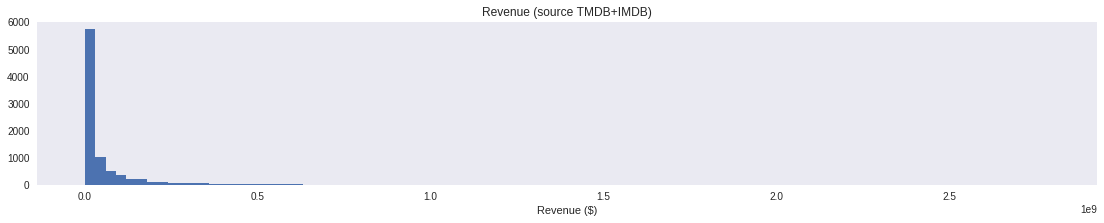

In [117]:
figure, axes = plt.subplots(1,1)

num_bins = int(np.sqrt(dfMoviesUS.shape[0]))
plt.hist(dfMoviesUS['revenue_final'], bins=num_bins)

plt.grid(False)
plt.xlabel('Revenue ($)')
plt.title('Revenue (source TMDB+IMDB)')
figure.set_size_inches([19,3])

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


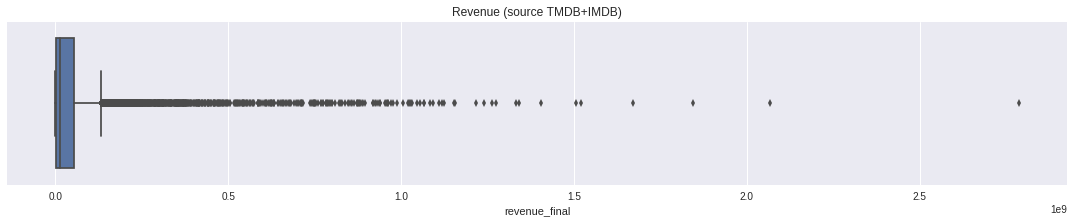

In [118]:
figure, axes = plt.subplots(1,1)

sns.boxplot(dfMoviesUS['revenue_final'])

figure.set_size_inches([19,3])
plt.title('Revenue (source TMDB+IMDB)')
plt.show()

In [119]:
dfMoviesUS[['revenue', 'imdb_revenue','revenue_final']].describe()

,revenue,imdb_revenue,revenue_final
count,7.973000e+03,4.010000e+03,8.790000e+03
mean,6.546499e+07,4.806592e+07,6.055134e+07
std,1.446889e+08,6.738378e+07,1.388242e+08
min,1.000000e+00,1.620000e+02,1.000000e+00
25%,1.562546e+06,5.488766e+06,1.300000e+06
50%,1.411001e+07,2.544575e+07,1.234577e+07
75%,6.103784e+07,6.220937e+07,5.320411e+07
max,2.787965e+09,7.605058e+08,2.787965e+09


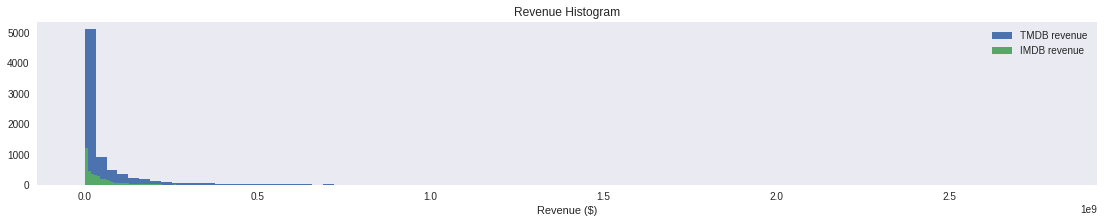

In [120]:
figure, axes = plt.subplots(1,1)

num_bins = int(np.sqrt(dfMoviesUS['revenue'].notnull().sum()))
plt.hist(dfMoviesUS['revenue'][dfMoviesUS['revenue'].notnull()], bins=num_bins, label='TMDB revenue')
plt.hist(dfMoviesUS['imdb_revenue'][dfMoviesUS['imdb_revenue'].notnull()], bins=num_bins, label='IMDB revenue')

plt.grid(False)
plt.xlabel('Revenue ($)')
plt.title('Revenue Histogram')
plt.legend(loc='best')
figure.set_size_inches([19,3])

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


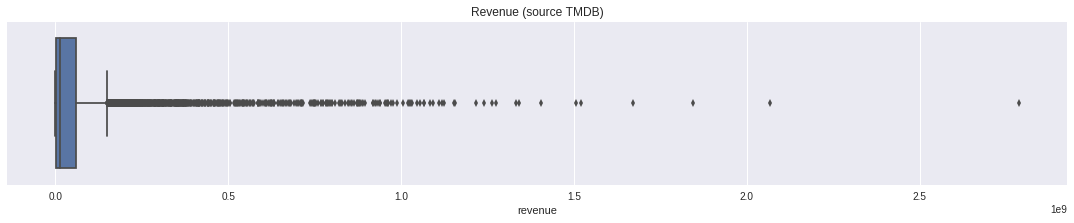

In [121]:
figure, axes = plt.subplots(1,1)

sns.boxplot(dfMoviesUS['revenue'])

figure.set_size_inches([19,3])
plt.title('Revenue (source TMDB)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


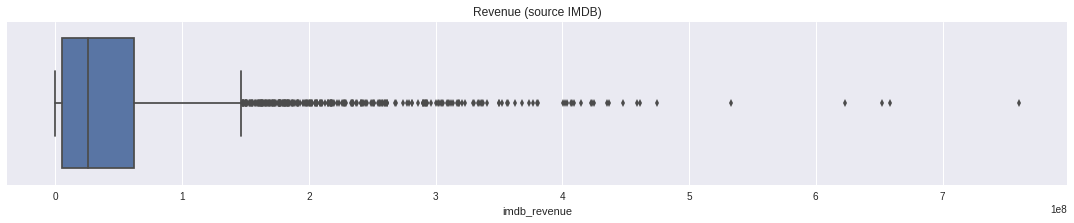

In [122]:
figure, axes = plt.subplots(1,1)

sns.boxplot(dfMoviesUS['imdb_revenue'])

figure.set_size_inches([19,3])
plt.title('Revenue (source IMDB)')
plt.show()

In [124]:
dfMoviesUS['revenue'].value_counts().sort_index().head(10)

1.0     27
2.0      8
3.0      5
4.0      4
5.0      9
6.0      7
7.0      6
8.0      9
9.0      4
10.0    10
Name: revenue, dtype: int64

In [125]:
dfMoviesUS['imdb_revenue'].value_counts().sort_index().head(10)

162.0     1
703.0     1
721.0     1
728.0     1
828.0     1
1111.0    1
1332.0    1
1521.0    1
1711.0    1
2436.0    1
Name: imdb_revenue, dtype: int64

We see that the proportion of very low values is higher in our TMDB source than in our IMDb source. And then we see very strange low values in TMDB. They could be errors. Let's analyze it deep in detail:

In [0]:
limit = 10000

In [127]:
dfMoviesUS[dfMoviesUS['revenue']<=limit].shape[0]

434

In [128]:
#How many have a value in IMDb?
dfMoviesUS[(dfMoviesUS['revenue']<=limit) & (dfMoviesUS['imdb_revenue'].notnull())].shape[0]

29

In [129]:
#Let's have a look to those:
dfMoviesUS[(dfMoviesUS['revenue']<=limit) & (dfMoviesUS['imdb_revenue'].notnull())][['revenue', 'imdb_revenue', 'revenue_final']].sort_values(by='revenue')

,revenue,imdb_revenue,revenue_final
movie_id,,,
11446,5.0,4771000.0,4771000.0
13006,5.0,5430822.0,5430822.0
108346,7.0,7680.0,7680.0
2196,8.0,8579684.0,8579684.0
12509,8.0,8596914.0,8596914.0
10496,10.0,10149779.0,10149779.0
217708,11.0,11835.0,11835.0
18475,12.0,11540112.0,11540112.0
14844,12.0,12189514.0,12189514.0


If we look above at movies with **`revenue`** (source TMDB) lower than 500 which have an equivalent value of **`imdb_revenue`** (source IMDb), we understand they are all errors. It is not clear for values higher than 500. We only have a movie in IMDb with revenue lower than 500 and this looks as being an error too (see below). So we will exclude all values up to 500 dollars. It is important to clean up this cases, as they could be outliers which disturb our model.

In [133]:
limit = 500
dfMoviesUS[dfMoviesUS['revenue']<=limit].shape[0]

283

In [131]:
dfMoviesUS[dfMoviesUS['imdb_revenue']<=limit].shape[0]

1

In [139]:
#This looks as being an error, if we compare revenue and budget:
dfMoviesUS[dfMoviesUS['imdb_revenue']<=limit].iloc[0]

belongs_to_collection_id                                                    NaN
belongs_to_collection_name                                                 None
budget                                                                    1e+07
imdb_id                                                               tt1641841
movie_id                                                                 327833
original_language                                                            en
original_title                                                       Skin Trade
overview                      After his family is killed by a Serbian gangst...
popularity                                                                5.164
release_date                                                2014-11-07 00:00:00
revenue                                                                     NaN
reviews_page                                                                  1
reviews_total_pages                     

In [140]:
#Proportion of values lower than 500 in TMDB:
dfMoviesUS[dfMoviesUS['revenue']<=limit].shape[0]/dfMoviesUS['revenue'].notnull().sum()

0.03549479493289853

In [141]:
#Proportion of values lower than 500 in IMDb:
dfMoviesUS[dfMoviesUS['imdb_revenue']<=limit].shape[0]/dfMoviesUS['imdb_revenue'].notnull().sum()

0.00024937655860349125

Before excluding those values, let´s see how they distribute throughout the years. Are we going to introduce a bias in first years? Could this values be correct for first years? As the volume of movies before 1950 (approx) is very low, it will be better to exclude from our study these first years and so develop a model for cinema after 1950. We will come to this issue again a bit later.

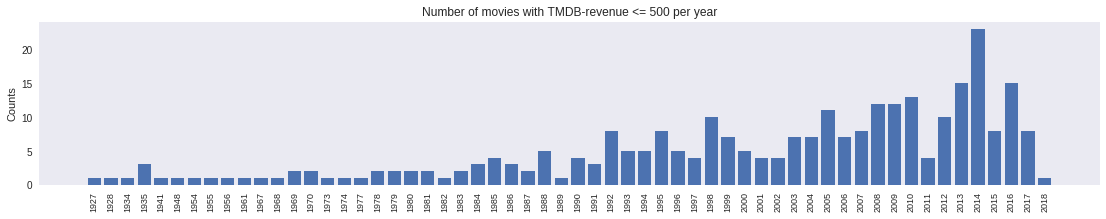

In [148]:
X = dfMoviesUS[dfMoviesUS['revenue']<=limit]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS[dfMoviesUS['revenue']<=limit]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies with TMDB-revenue <= %s per year'%limit)
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

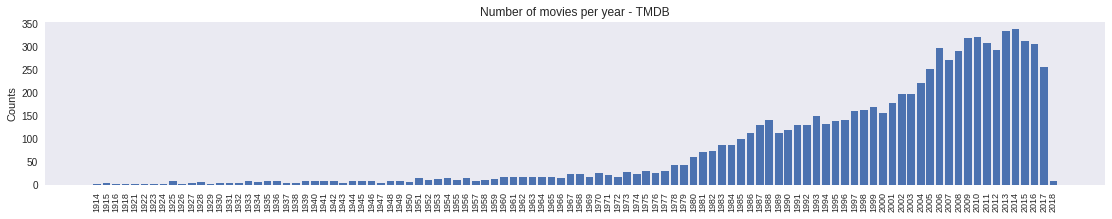

In [143]:
X = dfMoviesUS[dfMoviesUS['revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS[dfMoviesUS['revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year - TMDB')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

The information got from IMDb was published in September 2016. This is why we don´t see movies after 2016 in the graph below. So, considering revenue data for movies in 2016 could not be consolidated yet, we will not take IMDb revenue values since 2016.

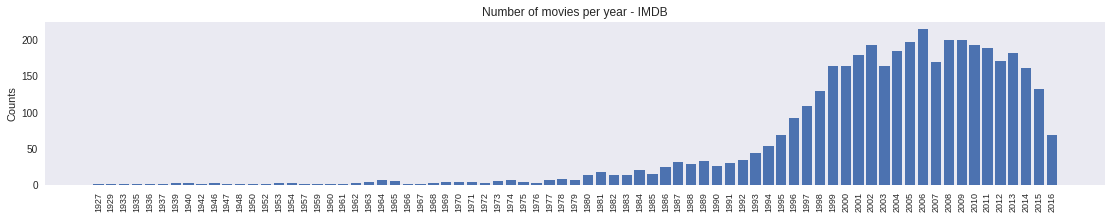

In [147]:
X = dfMoviesUS[dfMoviesUS['imdb_revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS[dfMoviesUS['imdb_revenue'].notnull()]['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year - IMDB')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

So **let´s apply the commented changes to revenue data:**

In [0]:
#We are going to add two columns that will keep the original values we got and that we are about to change:
dfMoviesUS['revenue_tmdb_corrected'] = None
dfMoviesUS['revenue_imdb_corrected'] = None

In [0]:
#We keep memory of the values we are about to change (values lower than $500):
dfMoviesUS.loc[dfMoviesUS['revenue']<=500, 'revenue_tmdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['revenue']<=500, 'revenue']
dfMoviesUS.loc[dfMoviesUS['imdb_revenue']<=500, 'revenue_imdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['imdb_revenue']<=500, 'imdb_revenue']

In [0]:
#We make nulls values lower than $500:
dfMoviesUS.loc[dfMoviesUS['revenue']<=500, 'revenue'] = None
dfMoviesUS.loc[dfMoviesUS['imdb_revenue']<=500, 'imdb_revenue'] = None

In [0]:
#We take as our valid value to work with the one from our original source TMDB, unless is null, then we take IMDB one.
dfMoviesUS['revenue_final'] = dfMoviesUS['revenue'].combine_first(dfMoviesUS['imdb_revenue'])

In [0]:
#From 2016-01-01 we always take TMDB values:
dfMoviesUS.loc[dfMoviesUS['release_date']>='2016-01-01','revenue_final'] = dfMoviesUS.loc[dfMoviesUS['release_date']>='2016-01-01','revenue']

In [154]:
#Let's check:
dfMoviesUS[dfMoviesUS['revenue_final']<=500].shape[0]

0

In [156]:
#Let's check:
dfMoviesUS[['revenue', 'imdb_revenue','revenue_final', 'revenue_tmdb_corrected', 'revenue_imdb_corrected']].count()

revenue                   7690
imdb_revenue              4009
revenue_final             8527
revenue_tmdb_corrected     283
revenue_imdb_corrected       1
dtype: int64

In [158]:
#Let's check:
dfMoviesUS[['revenue', 'imdb_revenue','revenue_final', 'revenue_tmdb_corrected', 'revenue_imdb_corrected']].isnull().sum()

revenue                   1100
imdb_revenue              4781
revenue_final              263
revenue_tmdb_corrected    8507
revenue_imdb_corrected    8789
dtype: int64

Later we will exclude from our analysis rows where revenue_final is null. Let´s come back to the issue about movies in first years:

In [0]:
#How many movies do we have before 1950?
dateLimit = '1950-01-01'

In [160]:
dfMoviesUS[(dfMoviesUS['revenue_final'].notnull()) & (dfMoviesUS['release_date']<dateLimit)].shape[0]

154

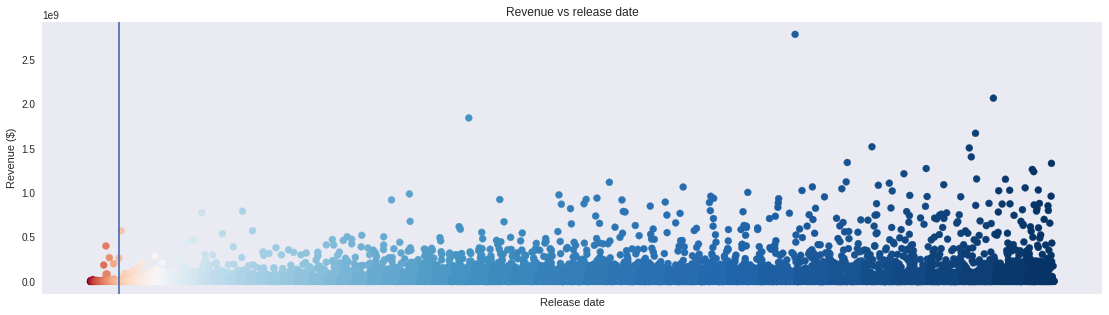

In [167]:
X = dfMoviesUS.sort_values(by='release_date')['release_date'].map(str)
Y = dfMoviesUS.sort_values(by='release_date')['revenue_final']

Years = dfMoviesUS.sort_values(by='release_date')['release_date'].map(lambda datetime: datetime.year)

figure, axes = plt.subplots(1,1)

plt.scatter(X, Y, cmap='RdBu', c=Years)
plt.axvline(x='1950-03-04 00:00:00')
plt.xticks([])
plt.grid(False)

plt.xlabel('Release date')
plt.ylabel('Revenue ($)')
plt.title('Revenue vs release date')

figure.set_size_inches([19,5])

plt.show()

Let's zoom first years:

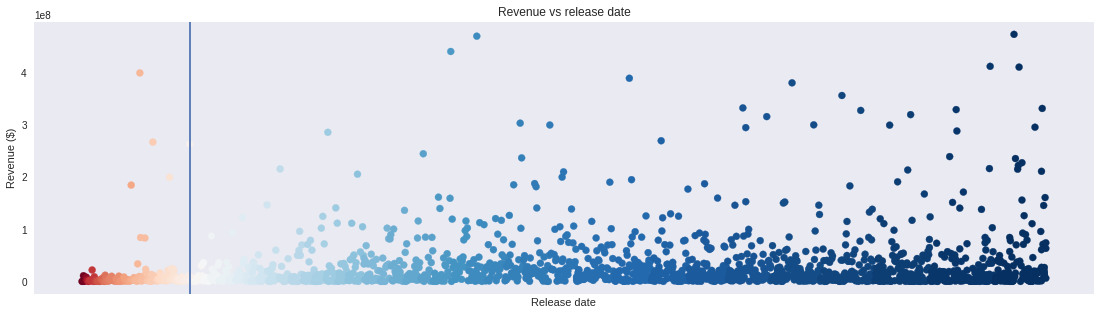

In [169]:
X = dfMoviesUS[(dfMoviesUS['revenue_final']<5e8) & (dfMoviesUS['release_date']<'1990-01-01')].sort_values(by='release_date')['release_date'].map(str)
Y = dfMoviesUS[(dfMoviesUS['revenue_final']<5e8) & (dfMoviesUS['release_date']<'1990-01-01')].sort_values(by='release_date')['revenue_final']

Years = dfMoviesUS[(dfMoviesUS['revenue_final']<5e8) & (dfMoviesUS['release_date']<'1990-01-01')].sort_values(by='release_date')['release_date'].map(lambda datetime: datetime.year)

figure, axes = plt.subplots(1,1)

plt.scatter(X, Y, cmap='RdBu', c=Years)
plt.axvline(x='1950-03-04 00:00:00')

plt.xticks([])
plt.grid(False)

plt.xlabel('Release date')
plt.ylabel('Revenue ($)')
plt.title('Revenue vs release date')

figure.set_size_inches([19,5])

plt.show()

Revenue behave somehow in a different way before 1950. It seems reasonable to exclude those 154 movies which will make our analysis worse. 

So finally let´s **update our universe excluding movies without valid revenue and movies released before 1950** (this will reduce our sample size in 263+154=417 rows).

In [176]:
print(dfMoviesUS.shape[0])
dfMoviesUS = dfMoviesUS[(dfMoviesUS['revenue_final'].notnull()) & (dfMoviesUS['release_date']>='1950-01-01')]
print(dfMoviesUS.shape[0])

8790
8373


Now let's have a look to the final distribution of revenue:

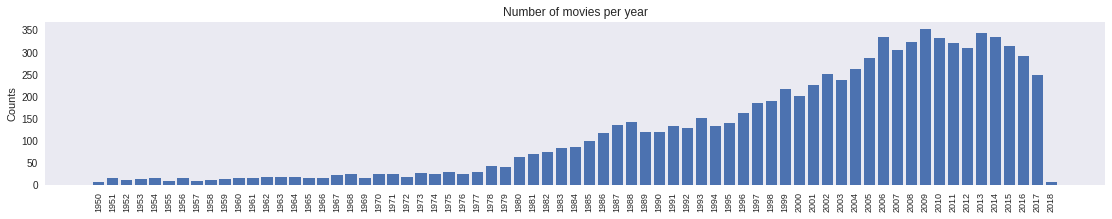

In [177]:
X = dfMoviesUS['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().index.map(lambda number: '%.0f'%number)
Y = dfMoviesUS['release_date'].map(lambda datetime: datetime.year).value_counts().sort_index().values

figure, axes = plt.subplots(1,1)

plt.bar(range(len(X)), Y)
plt.xticks(range(len(X)), X, rotation=90, size=9)
plt.grid(False)

plt.title('Number of movies per year')
plt.ylabel('Counts')

figure.set_size_inches([19,3])

plt.show()

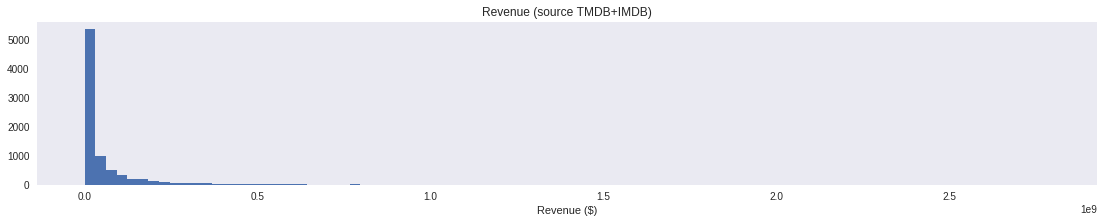

In [178]:
figure, axes = plt.subplots(1,1)

num_bins = int(np.sqrt(dfMoviesUS.shape[0]))
plt.hist(dfMoviesUS['revenue_final'], bins=num_bins)

plt.grid(False)
plt.xlabel('Revenue ($)')
plt.title('Revenue (source TMDB+IMDB)')
figure.set_size_inches([19,3])

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


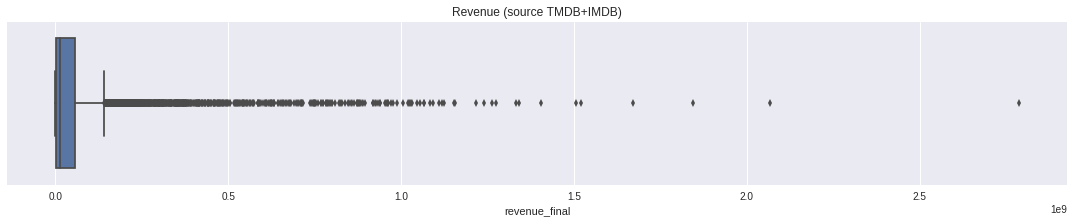

In [179]:
figure, axes = plt.subplots(1,1)

sns.boxplot(dfMoviesUS['revenue_final'])

figure.set_size_inches([19,3])
plt.title('Revenue (source TMDB+IMDB)')
plt.show()

We see the volume of outliers is high! We will deal with it later on our study.

###Budget

Although budget is not our target variable, we expect to be a critical feature. And, similarly to revenue, we could expect to have some bad quality data which could affect our conclusions.

In [180]:
dfMoviesUS[['budget', 'imdb_budget', 'budget_final']].describe()

,budget,imdb_budget,budget_final
count,5.791000e+03,3.921000e+03,6.249000e+03
mean,3.075224e+07,4.296269e+07,3.047979e+07
std,3.981566e+07,2.178613e+08,6.662064e+07
min,1.000000e+00,2.180000e+02,1.000000e+00
25%,6.000000e+06,9.000000e+06,5.200000e+06
50%,1.700000e+07,2.200000e+07,1.505000e+07
75%,4.000000e+07,5.000000e+07,3.700000e+07
max,5.000000e+08,1.221550e+10,4.200000e+09


In [0]:
limit = 10000

In [186]:
dfMoviesUS[dfMoviesUS['budget']<=limit].shape[0]

72

In [187]:
#Which of those have an equivalent value in IMDb?
dfMoviesUS[(dfMoviesUS['budget']<=limit) & (dfMoviesUS['imdb_budget'].notnull())].shape[0]

25

In [190]:
#Let's check those:
dfMoviesUS[(dfMoviesUS['budget']<=limit) & (dfMoviesUS['imdb_budget'].notnull())][['budget', 'imdb_budget', 'budget_final']].sort_values(by='budget')

,budget,imdb_budget,budget_final
movie_id,,,
48463,1.0,1400000.0,1400000.0
37532,1.0,1000000.0,1000000.0
12509,6.0,6000000.0,6000000.0
13006,7.0,7000000.0,7000000.0
67238,7.0,7000.0,7000.0
11980,8.0,8000000.0,8000000.0
2196,9.0,9000000.0,9000000.0
217708,10.0,10000000.0,10000000.0
78383,10.0,10000000.0,10000000.0


All values lower than 200 seem to be errors! Let's look at all of them:

In [195]:
#All movies whose budget is lower than 200:
dfMoviesUS[dfMoviesUS['budget']<200][['budget', 'imdb_budget', 'budget_final', 'release_date', 'original_title']].sort_values(by='budget')

,budget,imdb_budget,budget_final,release_date,original_title
movie_id,,,,,
37532,1.0,1000000.0,1000000.0,1998-10-07,Slam
48463,1.0,1400000.0,1400000.0,2004-12-17,Incident at Loch Ness
450154,1.0,NaN,1.0,2017-03-31,Bellator 175: Rampage vs. King Mo 2
59296,1.0,NaN,1.0,2011-06-03,"Love, Wedding, Marriage"
51107,4.0,NaN,4.0,2000-10-03,Whispers: An Elephant Tale
12509,6.0,6000000.0,6000000.0,2000-09-06,Pollock
13006,7.0,7000000.0,7000000.0,1992-05-01,Split Second
67238,7.0,7000.0,7000.0,2005-03-12,Cavite
11980,8.0,8000000.0,8000000.0,1995-09-01,The Prophecy


In [196]:
#There are not any values in IMDb lower than $200:
dfMoviesUS[dfMoviesUS['imdb_budget']<200].shape[0]

0

So we decide to consider as errors budget values lower than 200. We will make them null.

In [0]:
#We are going to add a column that will keep the original values we got and that we are about to change:
dfMoviesUS['budget_tmdb_corrected'] = None

In [0]:
#We keep memory of the values we are about to change (values lower than $200):
dfMoviesUS.loc[dfMoviesUS['budget']<200, 'budget_tmdb_corrected'] = dfMoviesUS.loc[dfMoviesUS['budget']<200, 'budget']

In [0]:
#We make nulls values lower than $200:
dfMoviesUS.loc[dfMoviesUS['budget']<200, 'budget'] = None

In [0]:
#We take as our valid value to work with the one from our original source TMDB, unless is null, then we take IMDB one.
dfMoviesUS['budget_final'] = dfMoviesUS['budget'].combine_first(dfMoviesUS['imdb_budget'])

In this case, we don´t need to take any consideration about restricting release date, as we underestand that budget is more easily consolidated than revenue. So we won´t restrict IMDb data after 2016.

In [201]:
#Let's check:
dfMoviesUS[dfMoviesUS['budget_final']<200].shape[0]

0

In [202]:
dfMoviesUS[['budget', 'imdb_budget', 'budget_final', 'budget_tmdb_corrected']].count()

budget                   5766
imdb_budget              3921
budget_final             6242
budget_tmdb_corrected      25
dtype: int64

In [204]:
dfMoviesUS[['budget', 'imdb_budget', 'budget_final', 'budget_tmdb_corrected']].isnull().sum()

budget                   2607
imdb_budget              4452
budget_final             2131
budget_tmdb_corrected    8348
dtype: int64